In [19]:
library("data.table")
library("qtl")

# inputs

In [20]:
genfile =  '../data/20210104_matrices2/20210224_rqtl_geno_wscomposite_onlyflipfilter_modifiedSexChrDesig.csv'
phefile = '../data/20210224_standardised_pheno_DiffSexDesig.csv'

In [21]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”
Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“1931 individuals with phenotypes but no genotypes
    43102|43202|43302|43402|43502|43602|43702|43802|45402|46002|47302|48802|49002|49402|49902|51802|55302|70802|75702|81802|82602|84802|87302|89702|90402|91002|92502|95602|101902|117602|123402|125602|126302|130102|131002|324003|324103|328303|328603|337903|347403|354903|329704|330004|335004|337404|342104|344304|349204|361004|362404|375204|611705|623505|634305|634505|634805|623305|842706|844606|844706|849906|850406|850506|852006|855906|857806|858006|858106|866406|910707|912007|913207|900507|900607|901107|901407|901907|902207|902607|902707|903007|903107|903307|903507|903707|903807|904307|904607|904907|905107|905407|906507|906607|906907|907007|907307|907707|907907|908007|908107|908407|908507|908707|908807|9089

 --Read the following data:
	 5287  individuals
	 1058  markers
	 4  phenotypes


Warning message in getsex(cross):
“215 individuals with missing sex; assuming they're female”
Warning message in fixXgeno.f2(cross, alleles):
“ --Omitting 54148 male heterozygote genotypes on the X chromosome.”
Warning message in fixXgeno.f2(cross, alleles):
“ --There appear to be some individuals of each cross direction, but "pgm" is not provided.
   Check the X chr genotype data and include a "pgm" column in the phenotype data.
   "pgm" was inferred (probably poorly).
   ”
Warning message in getsex(object):
“215 individuals with missing sex; assuming they're female”
Warning message in getsex(object):
“215 individuals with missing sex; assuming they're female”


 --Cross type: f2 


In [22]:
summary(datf2)

Warning message in getsex(object):
“215 individuals with missing sex; assuming they're female”
Warning message in getsex(object):
“215 individuals with missing sex; assuming they're female”


    F2 intercross

    No. individuals:    5287 

    No. phenotypes:     5 
    Percent phenotyped: 100 92.6 100 95.9 100 

    No. chromosomes:    30 
        Autosomes:      1.0 2.0 3.0 4.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 
                        15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 
                        26.0 27.0 28.0 29.0 30.0 
        X chr:          X 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  51.6 
    Genotypes (%):    
          Autosomes:        AA:26.0      AB:48.1      BB:25.9  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:6.2      ABf:3.3      ABr:8.9       BB:36.4 
                            AY:24.7      BY:20.5 

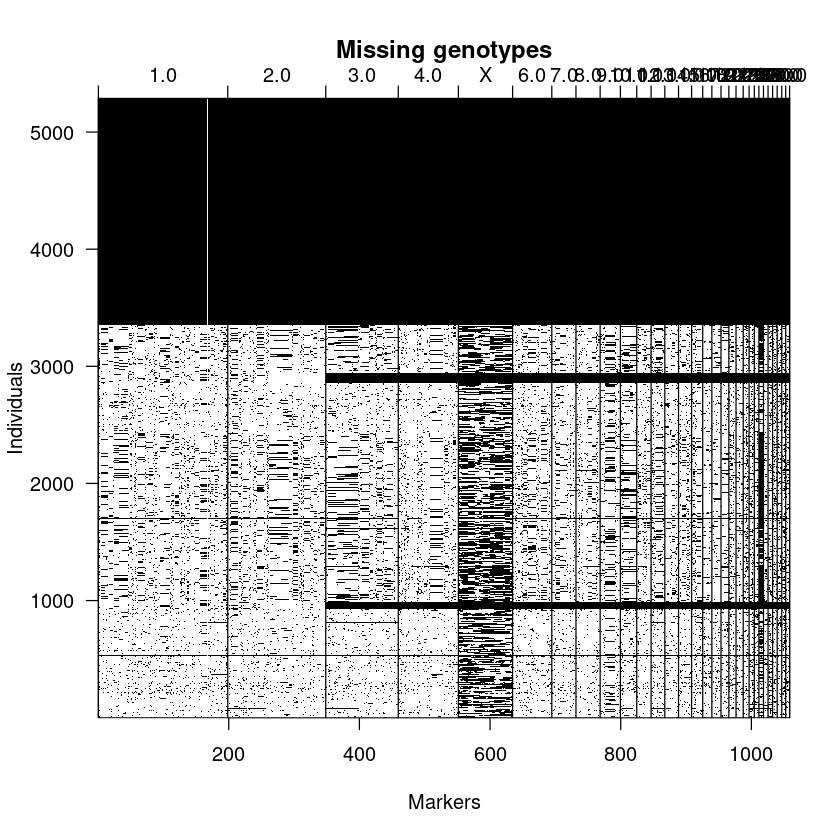

In [23]:
plotMissing(datf2)

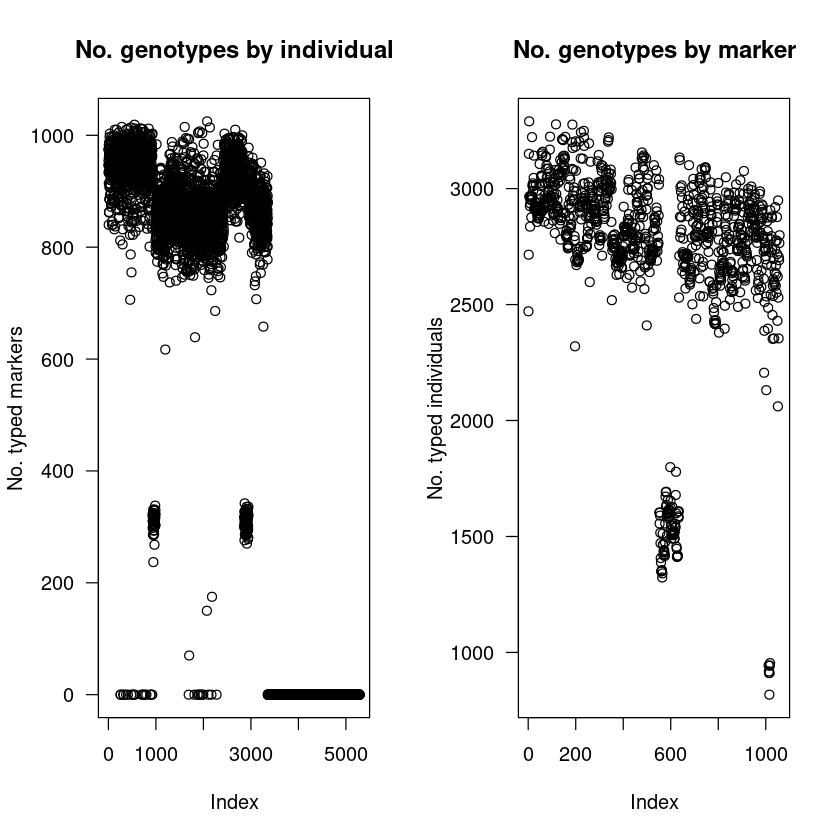

In [24]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [25]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 100])   # changed the filtering here


In [26]:
todrop

character(0)

In [27]:
datf2.1 <- drop.markers(datf2, todrop)

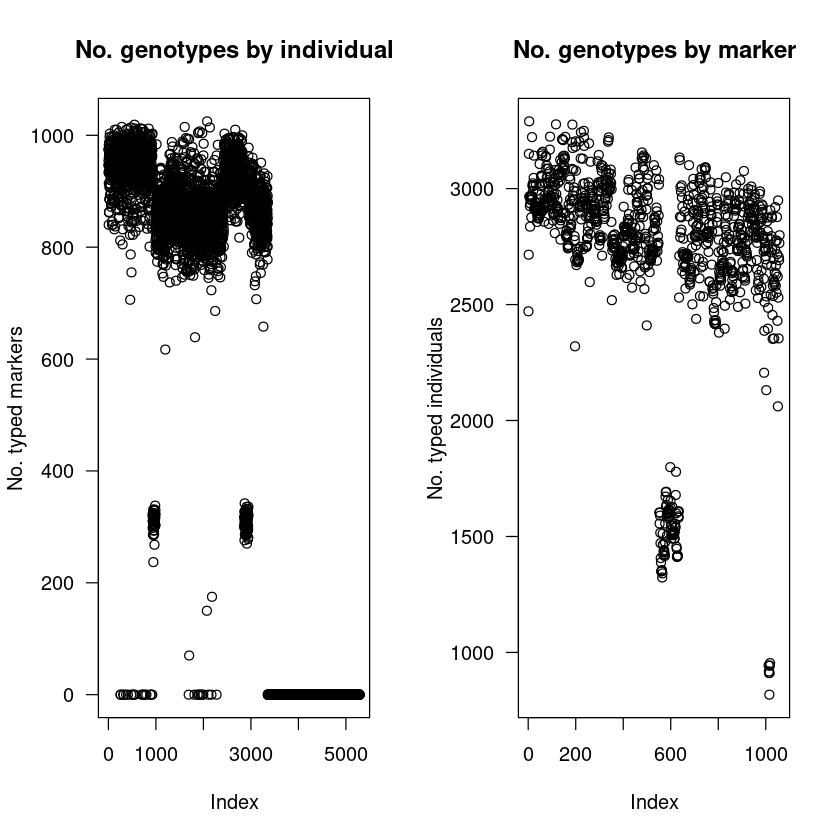

In [28]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [29]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>5)) # removing all individuals that have less than 0.5% of all markers
#datf2.2 <- datf2.1 # do not remove low marker individuals

In [30]:
summary(datf2.2)

Warning message in getsex(object):
“3 individuals with missing sex; assuming they're female”
Warning message in getsex(object):
“3 individuals with missing sex; assuming they're female”


    F2 intercross

    No. individuals:    3327 

    No. phenotypes:     5 
    Percent phenotyped: 100 98.2 99.9 99.9 100 

    No. chromosomes:    30 
        Autosomes:      1.0 2.0 3.0 4.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 
                        15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 
                        26.0 27.0 28.0 29.0 30.0 
        X chr:          X 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  81.9 
    Genotypes (%):    
          Autosomes:        AA:26.0      AB:48.1      BB:25.9  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:6.2      ABf:3.3      ABr:8.9       BB:36.4 
                            AY:24.7      BY:20.5 

In [31]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 5287

[1] 3327

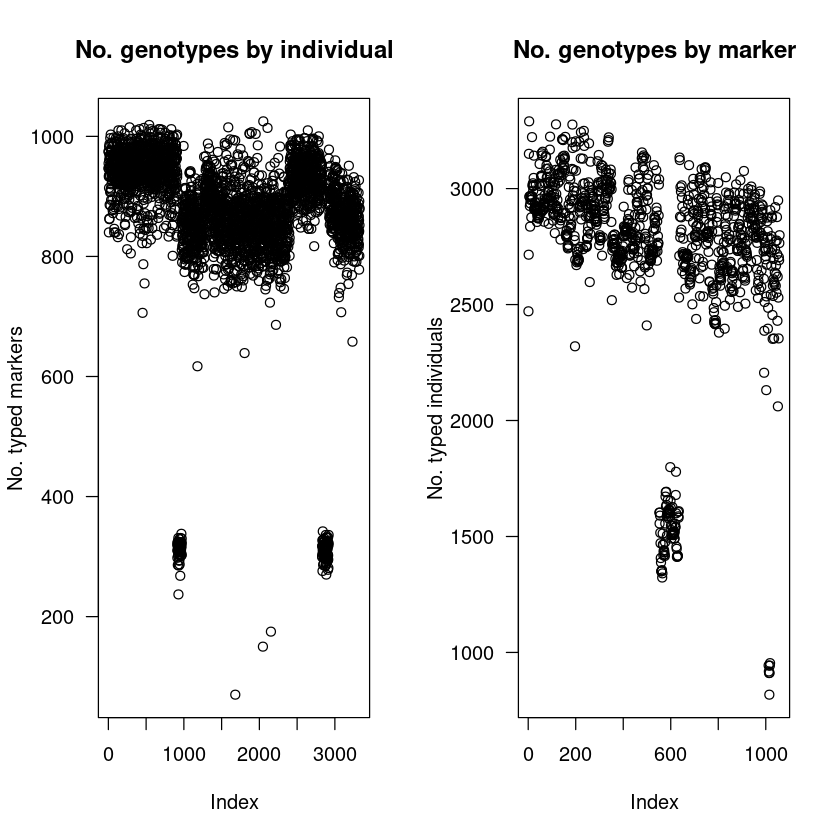

In [32]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [33]:
summary(datf2.2)

Warning message in getsex(object):
“3 individuals with missing sex; assuming they're female”
Warning message in getsex(object):
“3 individuals with missing sex; assuming they're female”


    F2 intercross

    No. individuals:    3327 

    No. phenotypes:     5 
    Percent phenotyped: 100 98.2 99.9 99.9 100 

    No. chromosomes:    30 
        Autosomes:      1.0 2.0 3.0 4.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 13.0 14.0 
                        15.0 16.0 17.0 18.0 19.0 20.0 21.0 22.0 23.0 24.0 25.0 
                        26.0 27.0 28.0 29.0 30.0 
        X chr:          X 

    Total markers:      1058 
    No. markers:        198 150 111 92 83 60 37 37 31 25 22 21 21 20 17 14 14 12 
                        11 11 9 8 7 7 7 7 7 7 6 6 
    Percent genotyped:  81.9 
    Genotypes (%):    
          Autosomes:        AA:26.0      AB:48.1      BB:25.9  not BB:0.0  
                        not AA:0.0  
       X chromosome:        AA:6.2      ABf:3.3      ABr:8.9       BB:36.4 
                            AY:24.7      BY:20.5 

In [34]:
cg <- comparegeno(datf2.2)

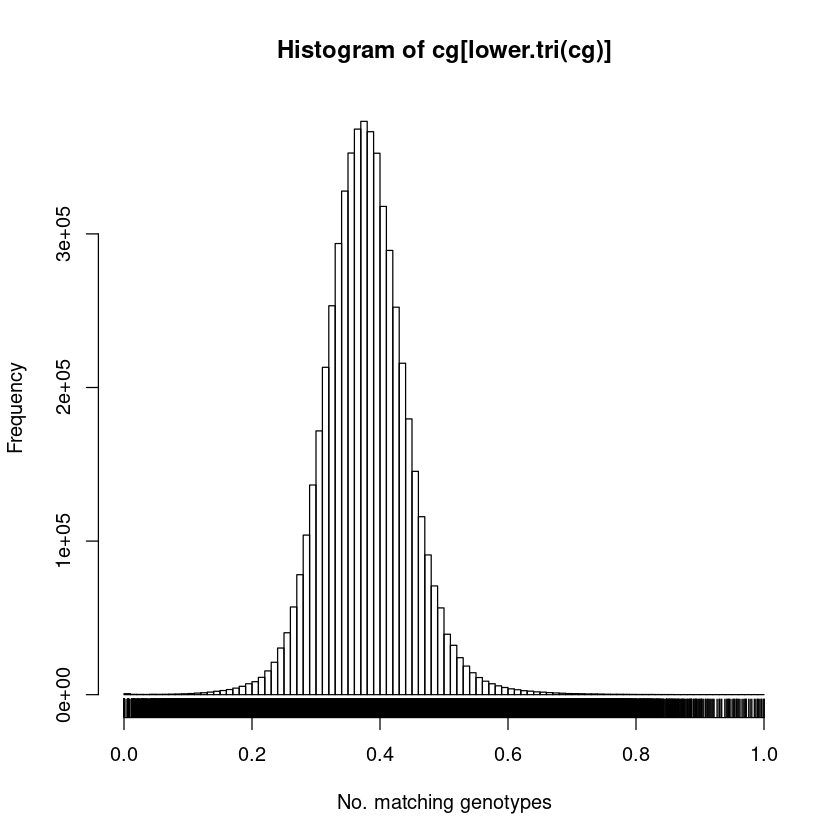

In [35]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [36]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [37]:
wh

,row,col
59402,7,965
100802,78,965
128402,112,965
99602,160,965
91202,364,965
40402,448,965
108202,453,965
58602,479,965
95102,672,965
101602,797,965


In [38]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`4-55`
[1] "4-56"

$`5-8`
[1] "5-9"

$`9-19`
[1] "9-18"



In [39]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


In [40]:

#### do not drop markers with segregation distortion


gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
#datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,ABf,AB,ABr,BB,not.BB,not.AA,AY,BY,P.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-0,1.0,856,495,0,1344,0,632,0,0,0,0,3.656995e-08
1-1,1.0,612,436,0,1356,0,923,0,0,0,0,1.152014e-38
1-2,1.0,177,521,0,1514,0,1115,0,0,0,0,2.128221e-50
1-3,1.0,37,615,0,1513,0,1162,0,0,0,0,7.998445e-45
1-4,1.0,361,561,0,1458,0,947,0,0,0,0,1.000770e-22
1-5,1.0,363,562,0,1478,0,924,0,0,0,0,6.227841e-20
1-6,1.0,402,554,0,1458,0,913,0,0,0,0,7.213652e-20
1-7,1.0,491,539,0,1417,0,880,0,0,0,0,1.559029e-18
1-8,1.0,391,587,0,1452,0,897,0,0,0,0,5.118093e-15


In [41]:
length(todrop)

[1] 743

In [42]:
datf2.3 <- datf2.2

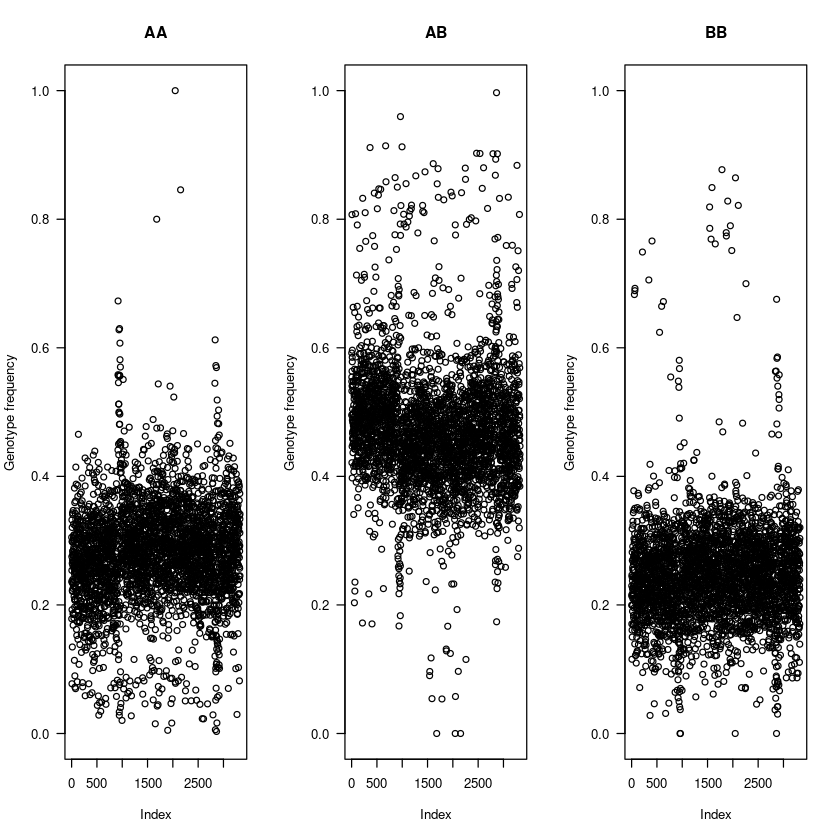

In [43]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

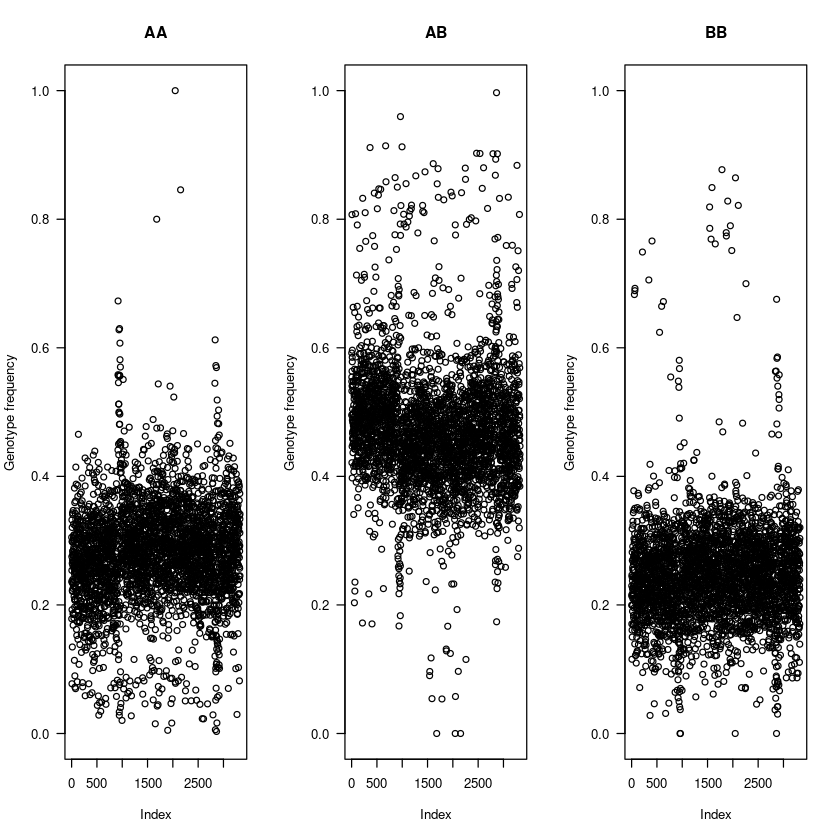

In [44]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [45]:
### do not filter for gfreq

In [46]:
#id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [47]:
#datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [48]:
datf2.4 <- datf2.3

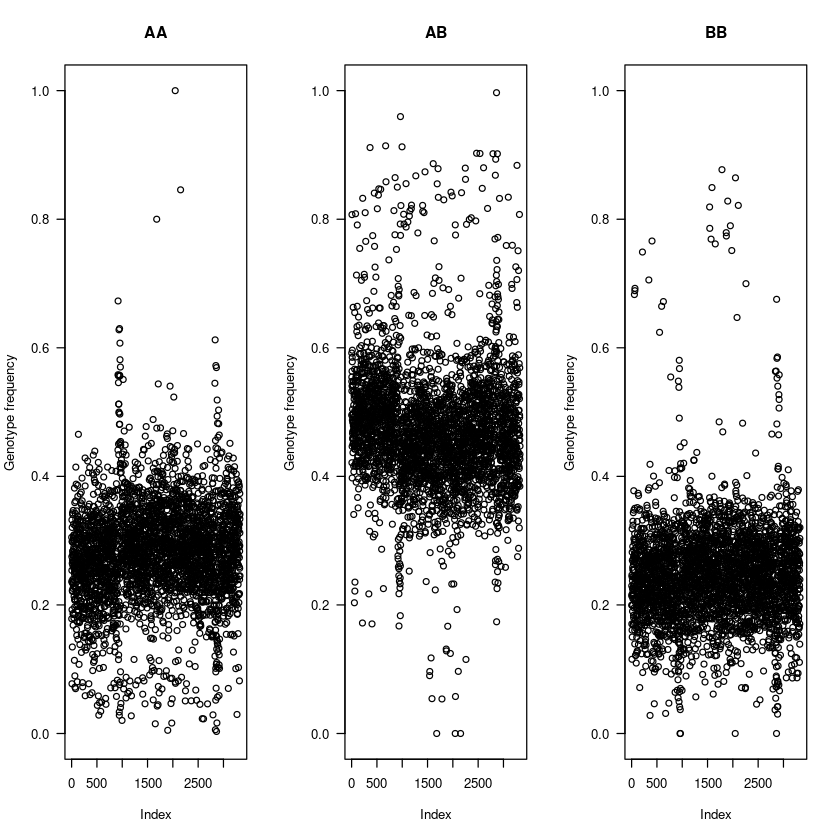

In [49]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [50]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”


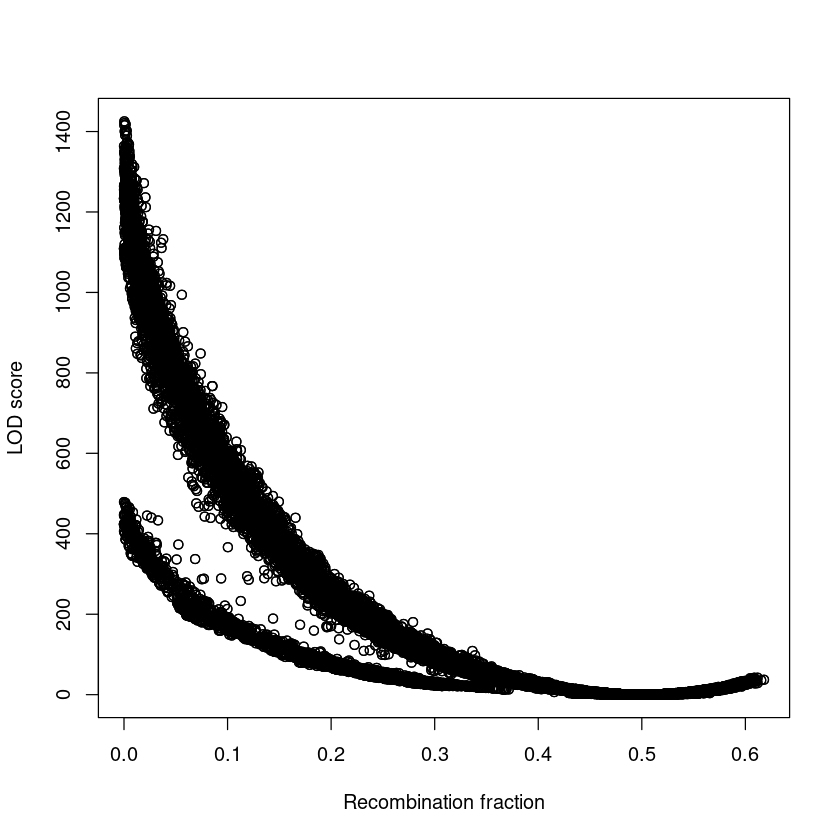

In [51]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

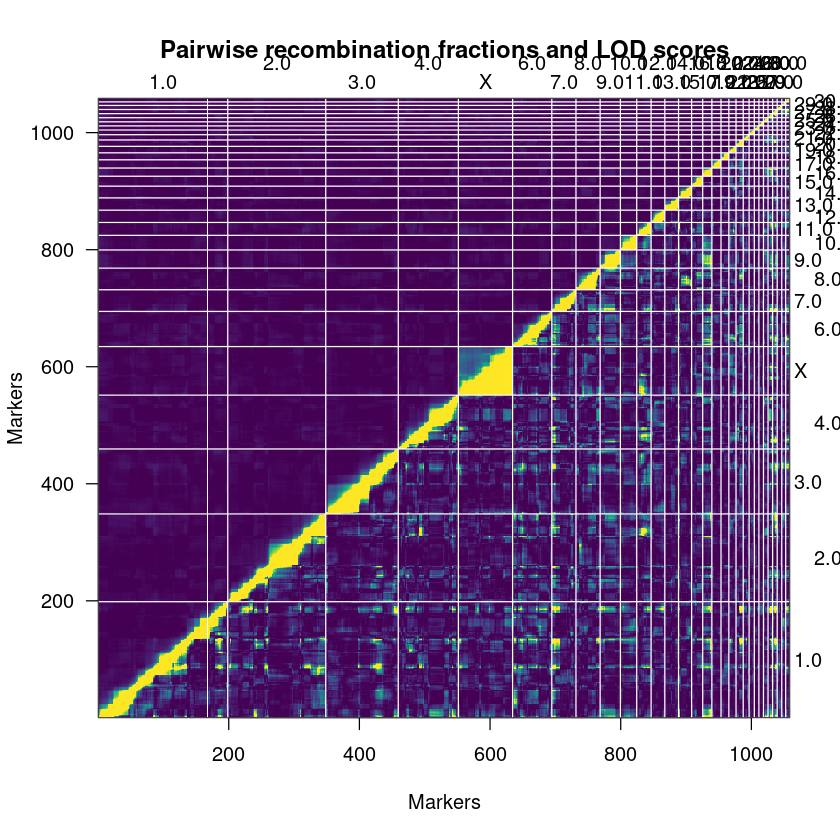

In [52]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [53]:
save.image('20210224_qtl_mapping_afterRF.Rdata')

In [ ]:
# maybe skip estimating the map for now?

genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

In [ ]:
save.image('20210224_qtl_mapping_aftergenmap.Rdata')

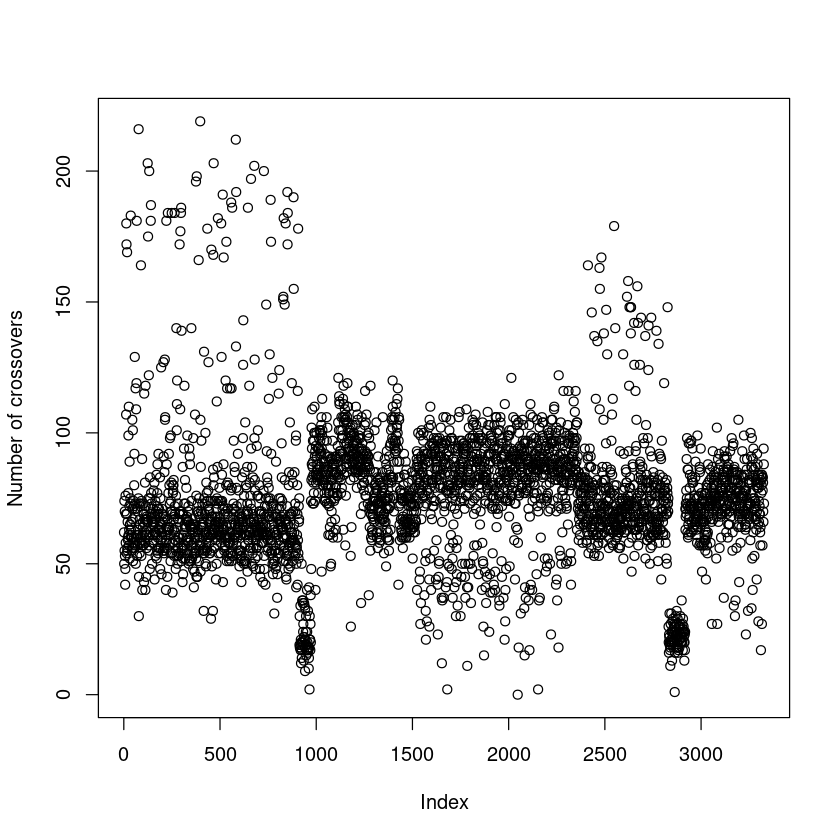

[1] 75.29696

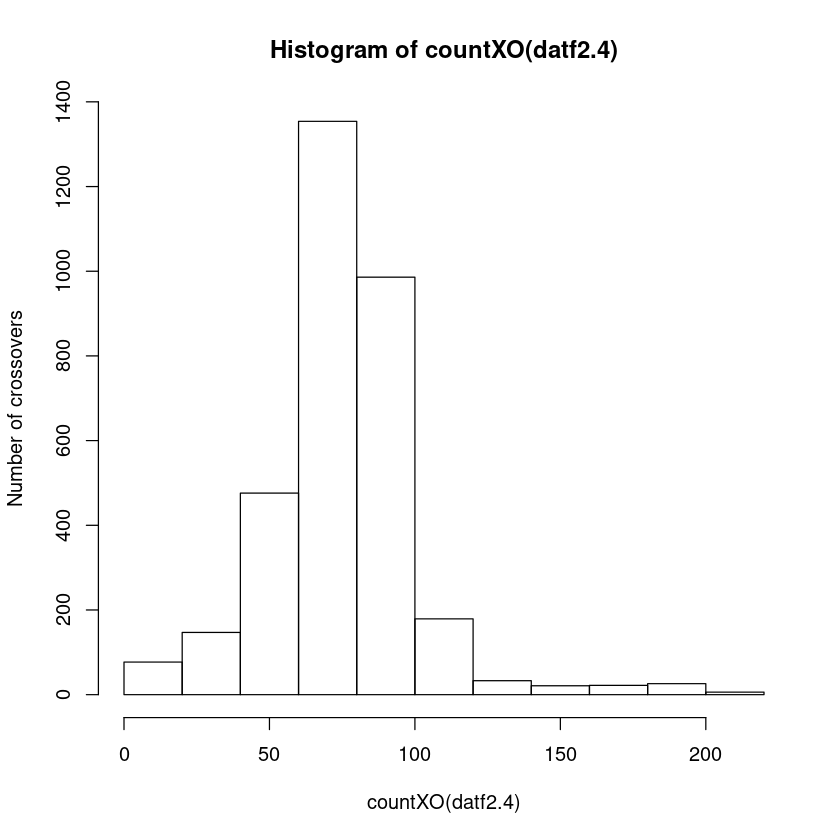

In [54]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [55]:
datf2.5 <- datf2.4

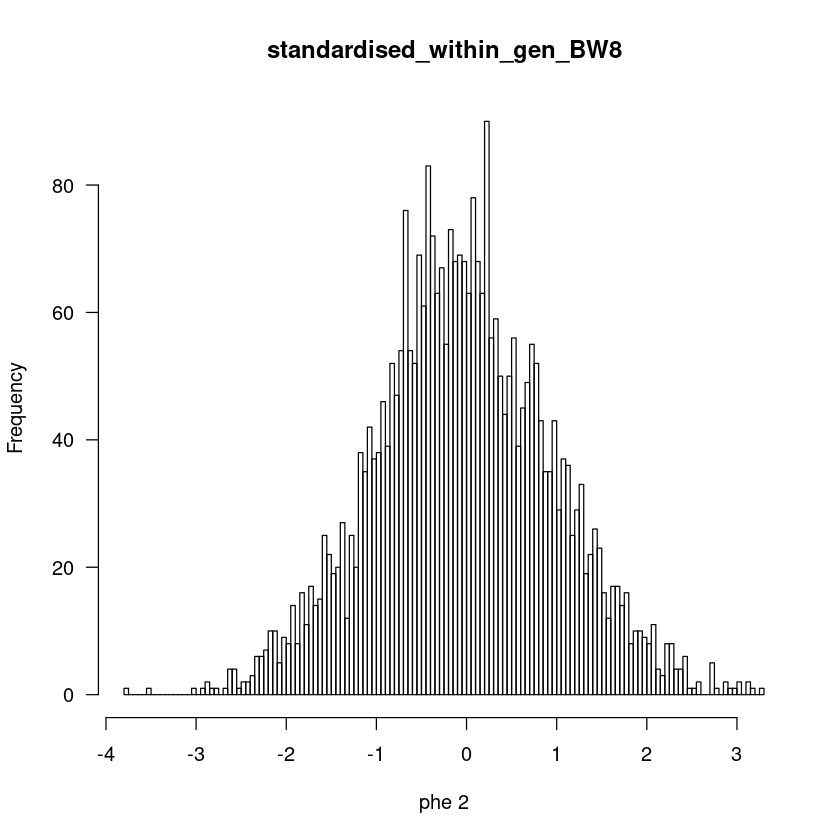

In [56]:
plotPheno(datf2.2, pheno.col=2)

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [57]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [58]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [73]:
ac <- pull.pheno(datf2.5, c("SEX")) 

In [78]:
ac2 <- as.numeric(ac)

[1]  2  2  1  1  1  2  2  2  1  2  1  1  2  1  2  2  2  2  1  1  2  2  1  1
  [25]  2  2  1  1  1  1  2  1  1  2  1  1  1  1  1  1  2  1  2  2  1  2  1  2
  [49]  2  1  1  1  1  2  1  1  1  1  2  1  2  2  1  1  2  1  1  2  2  1  1  2
  [73]  2  2  2  1  2  1  2  2  1  2  1  2  1  1  1  1  2  1  2  1  2  2  2  1
  [97]  1  1  2  1  2  1  2  2  2  2  1  2  1  1  1  2  1  1  1  2  1  1  1  2
 [121]  1  1  1  2  2  2  2  2  1  1  2  1  1  1  2  1  2  1  2  2  2  1  2  2
 [145]  1  1  2  1  1  2  1  1  2  2  1  1  2  1  1  2  2  1  1  1  1  2  2  2
 [169]  1  1  2  1  2  2  2  1  1  2  1  2  2  1  2  2  1  2  2  1  1  1  1  2
 [193]  2  1  1  1  2  2  2  2  2  2  2  1  2  2  1  1  1  2  2  1  1  1  1  1
 [217]  1  1  1  2  1  2  1  2  1  2  2  1  2  1  1  1  2  1  2  1  1  1  1  2
 [241]  1  1  2  1  1  2  2  2  2  2  1  1  2  1  2  1  2  1  2  2  2  1  1  1
 [265]  1  1  1  1  1  1  2  2  1  1  2  1  1  1  1  1  2  2  2  2  1  2  1  2
 [289]  2  2  2  1  1  1  1  1  2  1  2  1  1  1  1  2  2  2  2  2  1  1  1  2
 [313]  2  1  2  2  1  1  2  1  2  2  2  1  1  1  2  2  1  2  1  2  1  2  1  2
 [337]  2  1  2  1  1  2  2  2  2  2  1  1  1  1  2  1  2  1  2  2  1  2  2  2
 [361]  2  1  2  1  2  1  1  2  1  2  1  1  2  2  1  2  1  2  1  1  2  1  2  1
 [385]  1  2  1  2  2  2  1  2  1  1  2  2  2  1  2  2  1  1  1  1  1  1  2  1
 [409]  2  2  1  1  1  1  2  2  2  1  1  1  2  2  2  2  1  2  2  1  1  2  1  2
 [433]  2  2  1  1  2  1  1  2  2  1  2  1  2  2  2  2  1  2  1  1  1  2  1  2
 [457]  2  1  1  1  1  1  1  2  2  2  1  1  2  1  1  1  1  2  2  1  1  1  2  1
 [481]  2  2  2  1  2  1  2  2  1  1  1  2  2  1  2  1  1  2  1  1  1  2  2  1
 [505]  1  1  2  2  1  2  1  1  1  1  2  1  1  1  1  2  2  2  2  1  1  1  1  2
 [529]  2  1  2  2  2  2  2  2  1  2  2  2  1  2  2  1  2  1  2  1  2  1  2  1
 [553]  2  2  2  2  1  2  2  1  2  2  2  2  1  2  1  1  2  1  1  1  2  1  2  1
 [577]  1  1  2  1  2  1  2  1  1  1  2  2  2  1  2  1  2  2  1  1  1  2  1  1
 [601]  1  1  2  2  2  2  2  1  2  1  2  2  2  2  2  1  2  2  2  2  1  1  2  1
 [625]  1  2  1  1  2  1  1  2  1  2  2  2  2  1  1  2  2  1  2  2  1  1  2  1
 [649]  2  2  1  1  1  1  2  2  1  2  1  2  1  1  2  1  2  1  2  1  1  2  1  1
 [673]  2  2  2  1  2  2  1  2  1  1  1  1  1  1  2  2  2  1  2  2  2  1  2  2
 [697]  2  2  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  1  1  2  1  1
 [721]  2  2  2  2  1  1  1  2  1  2  1  2  1  1  1  2  2  1  2  1  2  2  1  1
 [745]  1  2  1  1  2  2  1  1  2  1  1  1  1  2  1  2  1  1  2  1  1  2  1  2
 [769]  2  2  2  2  1  2  1  1  1  2  2  1  1  1  1  2  2  2  2  1  1  2  2  2
 [793]  2  1  2  1  1  2  1  2  1  1  1  1  1  2  2  1  1  1  1  2  2  2  1  1
 [817]  2  2  1  2  2  2  2  2  2  1  1  1  1  2  1  1  1  2  1  1  2  1  1  1
 [841]  2  1  2  1  2  1  1  2  1  2  2  2  1  2  1  1  1  2  1  2  1  1  1  1
 [865]  2  1  1  1  2  2  2  2  2  2  2  2  1  2  2  1  2  1  2  2  1  2  1  2
 [889]  1  1  1  1  2  1  2  2  2  1  2  1  1  1  1  1  2  1  1  1  2  1  2  1
 [913]  2  2  1  1  2  1  2  2  2  2  2  1  2  1  1  1  2  1  1  2  1  1  1  2
 [937]  2  1  1  1  1  2  1  1  2  1  1  2  1  2  1  2  1  1  2  1  2  1  1  2
 [961]  2  2  2  1  2  1  2  2  2  1  2  2  2  2  1  1  1  1  2  1  1  2  1  2
 [985]  1  2  1  2  1  2  1  2  1  2  1  1  2  1  2  1  2  2  2  1  1  1  1  1
[1009]  2  2  1  2  2  1  1  1  2  1  2  1  2  2  2  2  2  2  1  2  1  1  1  1
[1033]  2  1  2  2  2  1  1  1  2  2  2  1  2  1  2  2  2  2  1  1  2  2  1  1
[1057]  2  2  1  1  2  1  1  2  2  2  1  1  1  1  2  1  1  2  1  1  1  1  2  1
[1081]  2  2  1  2  1  1  1  2  1  2  2  2  2  2  2  1  1  1  1  2  1  1  1  1
[1105]  2  2  2  2  2  2  2  1  2  2  1  1  1  2  1  2  1  2  2  2  2  1  1  1
[1129]  1  2  2  2  2  1  1  2  2  1  1  1  2  2  1  1  2  2  2  2  1  2  2  1
[1153]  2  2  1  2  2  2  1  2  1  2  1  2  2  2  2  2  1  2  1  2  1  1  2  1
[1177]  1  2  2  1  1  1  1  1  2  1  2  2  1  1  1  2  2  1  1  1  2  1  1  1
[1201]  1  2  2  1  1  1  2  1  2  1  2  2  1  2  2  

In [80]:
out.hk.AC <- scanone(datf2.5, pheno.col =2,addcovar = ac2,  method='hk') 

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”
Warning message in scanone(datf2.5, pheno.col = 2, addcovar = ac2, method = "hk"):
“Dropped 1 additive covariates on X chromosome.”


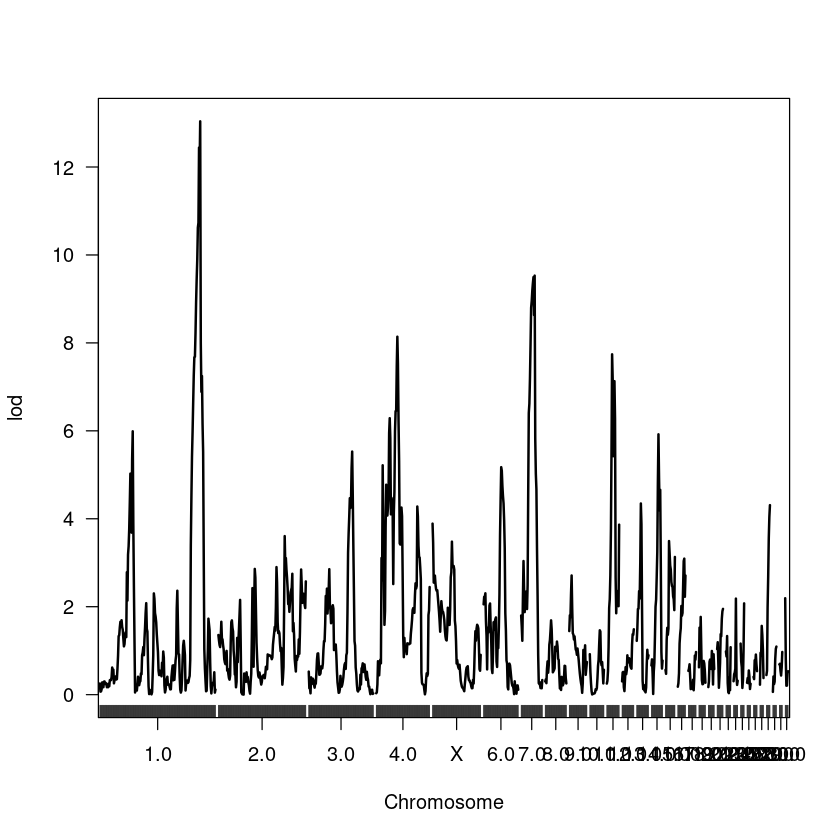

In [82]:
plot(out.hk.AC)

# get significance thresholds

In [ ]:
out.hk.ac.perm <- scanone(datf2.5, pheno.col = 2,  method='hk', addcovar=as.numeric(ac), n.perm = 10000, perm.Xsp = TRUE) 

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”


--Autosome permutations
Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Per

Warning message in scanone(cross, , pheno.col, model, method, addcovarp, intcovarp, :
“Dropped 1 additive covariates on X chromosome.”


In [86]:
datf2.5chr4 = subset(datf2.5, chr='4.0')
chr4ac = as.numeric(pull.pheno(datf2.5chr4, c("SEX")))

In [87]:
out.hk.ac.chr4.perm <- scanone(datf2.5chr4, pheno.col = 2, addcovar=chr4ac, method='hk', n.perm = 10000) 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”


Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Permutation 1160 
Permutati

In [97]:
datf2.5chrZ = subset(datf2.5, chr='X')

In [99]:
chrZac = as.numeric(pull.pheno(datf2.5chrZ, c("SEX")))
out.hk.ac.chrZ.perm <- scanone(datf2.5chrZ, pheno.col = 2, addcovar=chrZac, method='hk', n.perm = 10000, perm.Xsp = TRUE) 

Warning message in getsex(cross):
“3 individuals with missing sex; assuming they're female”
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 61 individuals with missing phenotypes.
”
Warning message in scanone.perm(cross, pheno.col, model, method, addcovar, intcovar, :
“All chromosomes of the same type, so X-chr specific permutations not needed.
”
Warning message in scanone(cross, , pheno.col, model, method, addcovarp, intcovarp, :
“Dropped 1 additive covariates on X chromosome.”


Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Permutation 1020 
Permutation 1040 
Permutation 1060 
Permutation 1080 
Permutation 1100 
Permutation 1120 
Permutation 1140 
Permutation 1160 
Permutati

In [93]:
summary(out.hk.ac.chrZ.perm)

ERROR: Error in summary(out.hk.ac.chrZ.perm): object 'out.hk.ac.chrZ.perm' not found


In [89]:
summary(out.hk.ac.chr4.perm)

LOD thresholds (10000 permutations)
     lod
5%  2.90
10% 2.56

In [94]:
summary(out.hk.precor.chrZ.perm)

ERROR: Error in summary(out.hk.precor.chrZ.perm): object 'out.hk.precor.chrZ.perm' not found


In [ ]:
summary(out.hk.ac.perm)

In [ ]:
plot(out.hk.precor)
abline(h=3.8)
abline(h=2.7)

In [ ]:
save.image('20210106_qtl_mapping_with_map_and_results.Rdata')

In [ ]:
load('./sc')

# extract positions

In [ ]:
chrom <- summary(out.hk.precor, threshold = 3.8)$chr
pos <- summary(out.hk.precor, threshold = 3.8)$pos

In [ ]:
chrom_sugg <- summary(out.hk.precor, threshold = 2.7)$chr
pos_sugg <- summary(out.hk.precor, threshold = 2.7)$pos

In [ ]:
#summary(out.hk.precor, threshold = 2.7, format = 'allpeaks')

In [ ]:
plot(out.hk.precor, chr=4)

In [ ]:
qtls <- makeqtl(test2, chr = chrom_sugg, pos = pos_sugg, what = 'prob')

In [ ]:
fit_sugg <- fitqtl(test2, pheno.col = 8, qtl = qtls, get.ests=TRUE)

In [ ]:
length(chrom_sugg)

In [ ]:
chrom <- chrom_sugg
pos <- pos_sugg
for (qtl in seq(1,10)){
    curr_chrom <- chrom[qtl]
    curr_pos <- pos[qtl]
    qtls <- makeqtl(test2, chr = curr_chrom, pos = curr_pos, what = 'prob')
    fit_sugg <- fitqtl(test2, pheno.col = 3, qtl = qtls, get.ests=TRUE, method = 'hk')
    print(summary(fit_sugg))
}

In [ ]:
#summary(fit_sugg)

In [ ]:
summary(out.hk.AC, threshold = 3.77, format = 'allpeaks')

In [ ]:
summary(out.hk.AC, threshold = 2.69, format = 'allpeaks')

In [ ]:
library('qtl')

# Cell Graveyard

# subset the data to only include Wahlberg F2s

In [ ]:
# READ list of individuals
IDs <- read.table('./20201116_all_wahlberg_individs_new_id.csv')

In [ ]:
idvec <- IDs[, 'V1']

In [ ]:
idvec <- as.double(idvec)

In [ ]:
all_individs <- datf2$pheno[,'id'] %in% idvec

In [ ]:
#subset
datf2= subset(datf2, ind = all_individs)

In [ ]:
summary(datf2)

# subset data to only include Wahlberg Markers

In [ ]:
# load data - which bins have a Wahlberg 2009 marker?
Wahlberg_bins = read.table('../../../../chicken-assoc-vis/data/20201117_all_bins_with_WB_marker.csv', sep = ',')

In [ ]:
datf2 <- pull.markers(datf2, Wahlberg_bins$V2 )